In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Reading Dataset

In [2]:
recipes = pd.read_csv('recipeData.csv', index_col='BeerID', encoding='latin1')
recipes

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
BeerID,,,,,,,,,,,,,,,,,,,,,
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Irish Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73857,Amber Alfie 2,/homebrew/recipe/view/609673/amber-alfie-2,British Strong Ale,36,21.00,1.052,1.012,5.22,39.73,6.96,...,1.060,63.0,3.0,Specific Gravity,All Grain,1.25,20.00,NaN,NaN,59658.0
73858,Rye IPA,/homebrew/recipe/view/610955/rye-ipa,Specialty IPA: Rye IPA,151,10.00,1.059,1.010,6.37,59.21,7.90,...,1.034,60.0,NaN,Specific Gravity,BIAB,0.50,22.00,NaN,NaN,NaN
73859,SK-Kölsch,/homebrew/recipe/view/586891/,NaN,111,16.00,1.046,1.008,5.01,25.42,3.63,...,1.041,65.0,NaN,Specific Gravity,BIAB,0.35,17.00,sucrose,140 g,82450.0


### Filtering the dataset by Irish Beer Types

In [3]:
Irish_Styles = np.array(['Irish Dry Stout', 'Irish Extra Stout', 'Irish Red Ale', 'Irish Pale Ale', 'Irish Cream Ale', 'Irish Lager'])

In [4]:
is_irish = recipes.Style.isin(Irish_Styles)
irish_recipes = recipes[is_irish]
irish_recipes

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
BeerID,,,,,,,,,,,,,,,,,,,,,
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Irish Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
8,Spotted Clown (New Glarus Spotted Cow clone),/homebrew/recipe/view/672/spotted-clown-new-gl...,Irish Cream Ale,45,20.82,1.054,1.014,5.36,19.97,5.94,...,1.040,70.0,1.4,Specific Gravity,All Grain,NaN,NaN,corn sugar,4.2 oz,116.0
43,Vanilla Caramel Cream Ale,/homebrew/recipe/view/5314/vanilla-caramel-cre...,Irish Cream Ale,45,18.93,1.055,1.014,5.43,33.67,10.08,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
86,Leffe Blonde Clone v2,/homebrew/recipe/view/73402/leffe-blonde-clone-v2,Irish Pale Ale,24,18.93,1.070,1.020,6.47,23.28,5.93,...,1.174,50.0,NaN,Specific Gravity,extract,0.35,21.11,NaN,NaN,19124.0
113,Brooklyn Lager clone,/homebrew/recipe/view/114849/brooklyn-lager-clone,Irish Lager,167,5.00,1.060,1.017,5.65,34.79,11.92,...,1.043,57.0,NaN,Specific Gravity,All Grain,NaN,19.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73774,Imperial Adirondack Cream Ale 4.0,/homebrew/recipe/view/597425/imperial-adironda...,Irish Cream Ale,45,24.61,1.079,1.018,8.49,23.25,6.75,...,1.064,75.0,1.5,Specific Gravity,All Grain,1.25,18.33,NaN,NaN,41468.0
73791,Pale Ale,/homebrew/recipe/view/508403/pale-ale,Irish Pale Ale,24,37.85,1.050,1.002,6.35,39.82,10.94,...,1.040,70.0,1.5,Specific Gravity,All Grain,1.00,17.22,NaN,NaN,NaN
73834,Cascade Cream Ale,/homebrew/recipe/view/620852/cascade-cream-ale,Irish Cream Ale,45,11.00,1.043,1.007,4.73,18.72,2.72,...,1.034,65.0,NaN,Specific Gravity,BIAB,0.75,20.00,Cane sugar,70 grams,NaN


## Cleaning Data

### Converting 'N/A' values to null values

In [5]:
irish_recipes.replace('N/A', 'NA')
irish_recipes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3381 entries, 1 to 73860
Data columns (total 22 columns):
Name             3381 non-null object
URL              3381 non-null object
Style            3381 non-null object
StyleID          3381 non-null int64
Size(L)          3381 non-null float64
OG               3381 non-null float64
FG               3381 non-null float64
ABV              3381 non-null float64
IBU              3381 non-null float64
Color            3381 non-null float64
BoilSize         3381 non-null float64
BoilTime         3381 non-null int64
BoilGravity      3254 non-null float64
Efficiency       3381 non-null float64
MashThickness    2050 non-null float64
SugarScale       3381 non-null object
BrewMethod       3381 non-null object
PitchRate        1644 non-null float64
PrimaryTemp      2407 non-null float64
PrimingMethod    335 non-null object
PrimingAmount    247 non-null object
UserId           1080 non-null float64
dtypes: float64(13), int64(2), object(7)
memory

### Summary Statistics

In [6]:
irish_recipes.describe().T

,count,mean,std,min,25%,50%,75%,max
StyleID,3381.0,76.712807,42.675111,24.000,45.000,92.000,92.000,167.00000
Size(L),3381.0,42.066146,154.476516,2.270,18.930,20.820,24.000,4900.00000
OG,3381.0,1.308309,1.733528,1.005,1.048,1.052,1.058,19.00150
FG,3381.0,1.057798,0.326218,0.999,1.010,1.012,1.015,5.86026
ABV,3381.0,5.342884,1.237585,0.480,4.780,5.240,5.740,48.56000
IBU,3381.0,27.395442,16.989490,0.000,20.000,24.790,32.160,471.00000
Color,3381.0,12.987903,9.819424,1.020,5.190,11.320,16.130,50.00000
BoilSize,3381.0,47.900639,164.841968,2.000,22.710,28.000,30.000,5050.00000
BoilTime,3381.0,65.526767,12.552809,0.000,60.000,60.000,60.000,150.00000
BoilGravity,3254.0,1.289030,1.774921,1.004,1.037,1.042,1.050,52.60000


### % of null values in each column

In [7]:
irish_recipes.isnull().sum()/3381*100

Name              0.000000
URL               0.000000
Style             0.000000
StyleID           0.000000
Size(L)           0.000000
OG                0.000000
FG                0.000000
ABV               0.000000
IBU               0.000000
Color             0.000000
BoilSize          0.000000
BoilTime          0.000000
BoilGravity       3.756285
Efficiency        0.000000
MashThickness    39.367051
SugarScale        0.000000
BrewMethod        0.000000
PitchRate        51.375333
PrimaryTemp      28.808045
PrimingMethod    90.091689
PrimingAmount    92.694469
UserId           68.056788
dtype: float64

### Dropping coulmns with >25% null values

In [8]:
irish_recipes = pd.DataFrame(irish_recipes)
irish_recipes = irish_recipes.drop(columns=['MashThickness', 'PitchRate', 'PrimaryTemp', 'PrimingMethod', 'PrimingAmount', 'UserId'])

# also dropping other unnecessary columns
irish_recipes = irish_recipes.drop(columns=['URL', 'StyleID'])

In [9]:
irish_recipes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3381 entries, 1 to 73860
Data columns (total 14 columns):
Name           3381 non-null object
Style          3381 non-null object
Size(L)        3381 non-null float64
OG             3381 non-null float64
FG             3381 non-null float64
ABV            3381 non-null float64
IBU            3381 non-null float64
Color          3381 non-null float64
BoilSize       3381 non-null float64
BoilTime       3381 non-null int64
BoilGravity    3254 non-null float64
Efficiency     3381 non-null float64
SugarScale     3381 non-null object
BrewMethod     3381 non-null object
dtypes: float64(9), int64(1), object(4)
memory usage: 396.2+ KB


### Replacing null values 

In [10]:
replace_value = np.nanmedian(irish_recipes['BoilGravity'])
irish_recipes['BoilGravity'].fillna(replace_value, inplace = True)
irish_recipes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3381 entries, 1 to 73860
Data columns (total 14 columns):
Name           3381 non-null object
Style          3381 non-null object
Size(L)        3381 non-null float64
OG             3381 non-null float64
FG             3381 non-null float64
ABV            3381 non-null float64
IBU            3381 non-null float64
Color          3381 non-null float64
BoilSize       3381 non-null float64
BoilTime       3381 non-null int64
BoilGravity    3381 non-null float64
Efficiency     3381 non-null float64
SugarScale     3381 non-null object
BrewMethod     3381 non-null object
dtypes: float64(9), int64(1), object(4)
memory usage: 396.2+ KB


In [11]:
np.count_nonzero(irish_recipes['SugarScale'] == 'Plato')

73

### Extracting rows with Specific Gravity units

In [12]:
is_sg = (irish_recipes['SugarScale'] == 'Specific Gravity')
irish_recipes = irish_recipes[is_sg]

In [13]:
irish_recipes.shape

(3308, 14)

In [14]:
irish_recipes.describe().T

,count,mean,std,min,25%,50%,75%,max
Size(L),3308.0,39.389011,147.801663,2.270,18.9300,20.820,23.0000,4900.00
OG,3308.0,1.053273,0.012571,1.005,1.0480,1.052,1.0570,1.50
FG,3308.0,1.012566,0.004140,0.999,1.0100,1.012,1.0140,1.13
ABV,3308.0,5.345227,1.246387,0.480,4.7775,5.240,5.7400,48.56
IBU,3308.0,27.412663,17.077025,0.000,20.0000,24.790,32.1525,471.00
Color,3308.0,12.970342,9.789960,1.020,5.1700,11.360,16.1300,50.00
BoilSize,3308.0,44.999933,157.240082,2.000,22.4500,28.000,30.0000,5050.00
BoilTime,3308.0,65.533857,12.604774,0.000,60.0000,60.000,60.0000,150.00
BoilGravity,3308.0,1.046958,0.023370,1.004,1.0370,1.042,1.0480,1.50
Efficiency,3308.0,66.580834,13.783198,0.000,65.0000,70.000,75.0000,100.00


### Storing the summary to a csv file using NumPy

In [15]:
summary = irish_recipes.describe().T
#summary.insert(0, "category", summary.index)
summary.index
np.savetxt('summary.csv', summary, fmt='%.4f', delimiter=',', newline='\n', header=str(summary.columns), footer='', comments='# ', encoding='latin1')

### Storing the cleaned data to a csv file using Pandas

In [16]:
irish_recipes.to_csv('irishRecipes.csv')

## Visualizations

### Brew Methods Pie Chart

Text(0.5, 1.0, 'Brew method distribution')

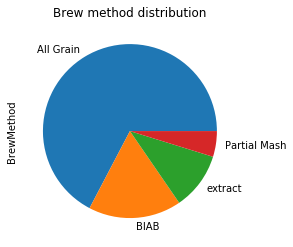

In [17]:
irish_recipes.BrewMethod.value_counts().plot(kind="pie")
plt.title("Brew method distribution")

### Regression Plot for BoilSize vs. BoilTime

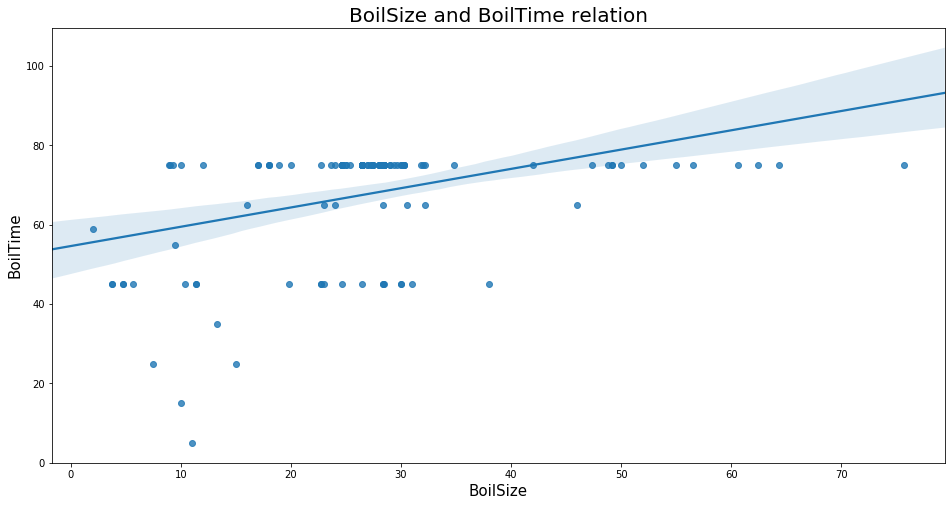

In [18]:
df_boil = irish_recipes[(irish_recipes['BoilSize']<=100) & (irish_recipes['BoilTime'])]

plt.figure(figsize=(16,8))
sn.regplot(df_boil['BoilSize'],df_boil['BoilTime'])
plt.title('BoilSize and BoilTime relation', fontsize=20)
plt.xlabel('BoilSize', fontsize=15)
plt.ylabel('BoilTime', fontsize=15)
plt.show()

### Histograms

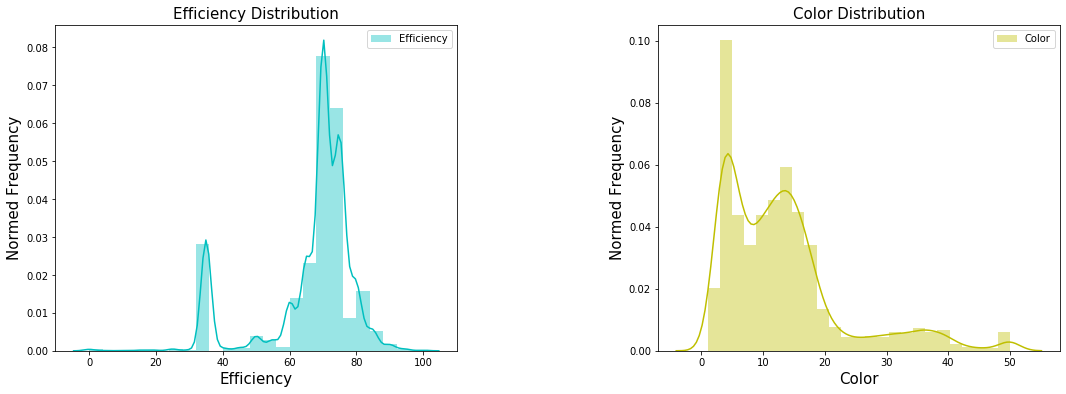

In [19]:
plt.figure(figsize=(18,6))
count=0
for col, color in zip(['Efficiency', 'Color'],['c','y']):
    count+=1
    plt.subplot(1,2,count)
    sn.distplot(irish_recipes[col], bins=25, label=col, color=color)
    plt.title('{} Distribution'.format(col), fontsize=15)
    plt.legend()
    plt.ylabel('Normed Frequency', fontsize=15)
    plt.xlabel('{}'.format(col), fontsize=15)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

### Logarithmic Histograms

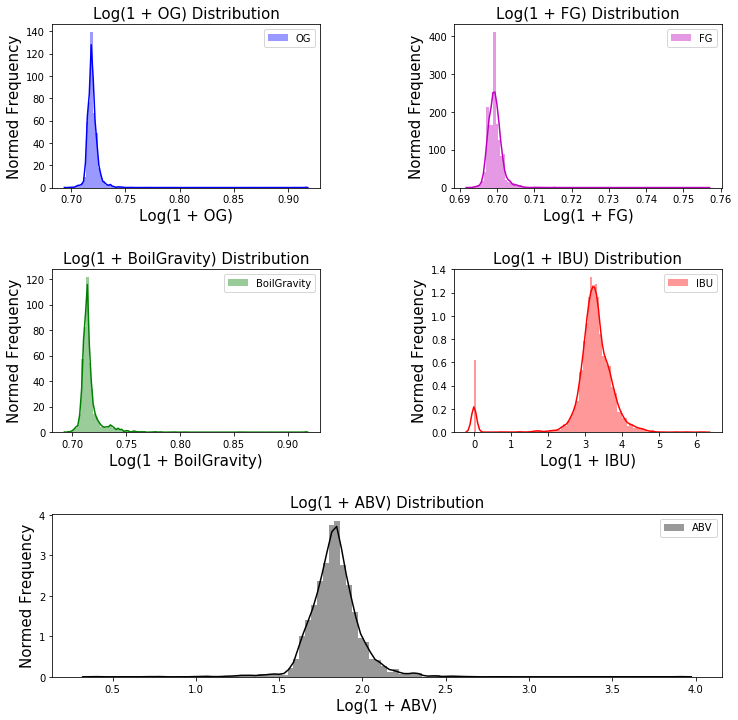

In [20]:
plt.figure(figsize=(12,12))
count=0
for col, color in zip(['OG', 'FG', 'BoilGravity','IBU','ABV'],['b','m','g','r','k']):
    count+=1
    if(count==5):
        plt.subplot(3,2,(5,6))
    else:
        plt.subplot(3,2,count)
    sn.distplot(np.log1p(irish_recipes[col]), bins=100, label=col, color=color)
    plt.title('Log(1 + {}) Distribution'.format(col), fontsize=15)
    plt.legend()
    plt.ylabel('Normed Frequency', fontsize=15)
    plt.xlabel('Log(1 + {})'.format(col), fontsize=15)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

### Correlations with Heat Map

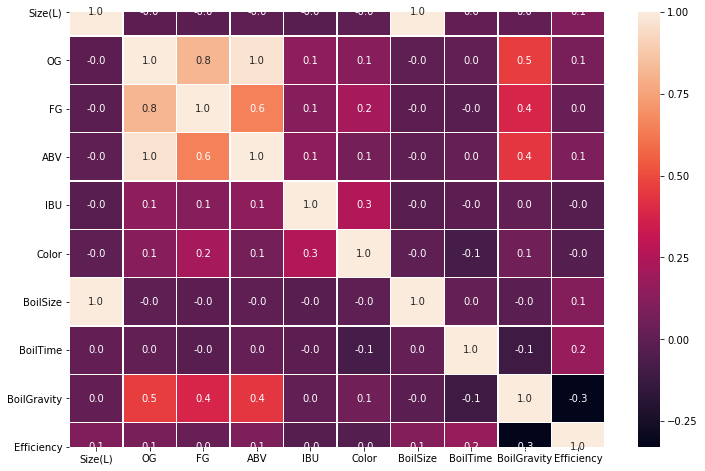

In [21]:
f,ax = plt.subplots(figsize=(12, 8))
sn.heatmap(irish_recipes.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)

### Violinplots on %ABV by Beer Styles

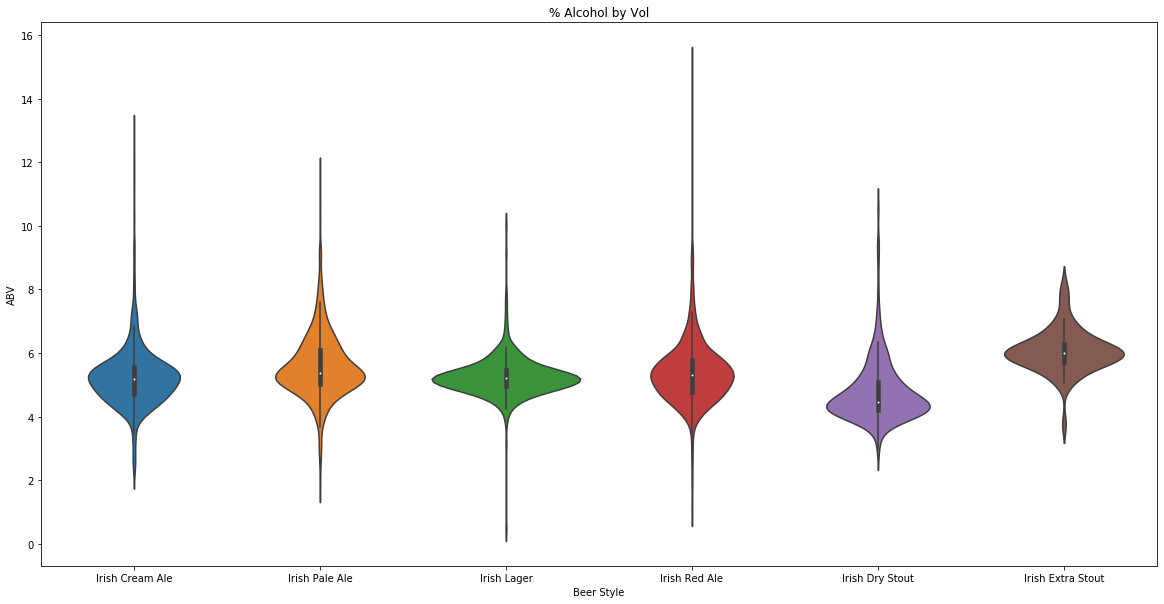

In [22]:
abv_df = irish_recipes[irish_recipes['ABV'] <= 25]

fig, ax = plt.subplots(1, 1, figsize=[20, 10])
sn.violinplot(x='Style',y='ABV', data=abv_df, ax=ax)
ax.set_xlabel('Beer Style')
ax.set_title('% Alcohol by Vol')
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
plt.show()